In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [2]:
df = pd.read_csv("/content/Housing_test_data.csv")

In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
from category_encoders import OneHotEncoder

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df1 = df[["area","price"]]
df1.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [8]:
df1.describe()

,area,price
count,545.000000,5.450000e+02
mean,5150.541284,4.766729e+06
std,2170.141023,1.870440e+06
min,1650.000000,1.750000e+06
25%,3600.000000,3.430000e+06
50%,4600.000000,4.340000e+06
75%,6360.000000,5.740000e+06
max,16200.000000,1.330000e+07


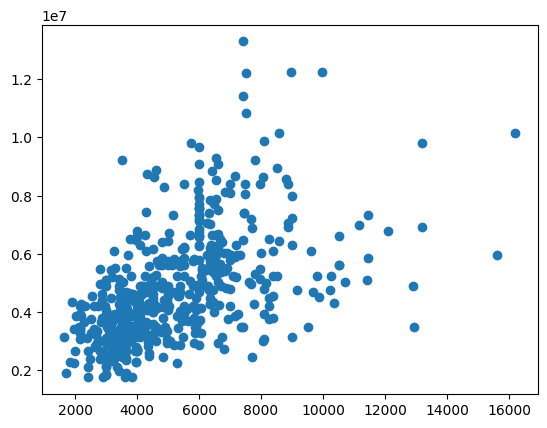

In [9]:
plt.scatter(x=df1["area"], y = df1["price"])

In [10]:
X = df1[["area"]]
y = df1.price

y.shape

(545,)

In [11]:
y_mean = y.mean()
Y_pred_baseline = [y_mean]*len(y)

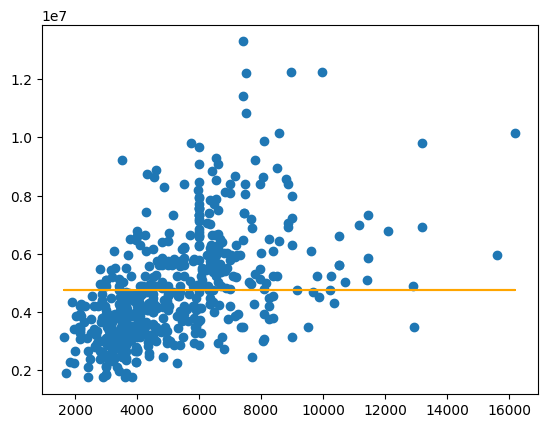

In [12]:
plt.plot(X.values, Y_pred_baseline, color = "orange")
plt.scatter(X,y)

In [13]:
mae_baseline = mean_absolute_error(y,Y_pred_baseline)
mae_baseline

1440702.9248043096

In [14]:
model = LinearRegression()

model.fit(X,y)

LinearRegression()

In [15]:
y_m = model.predict(X)

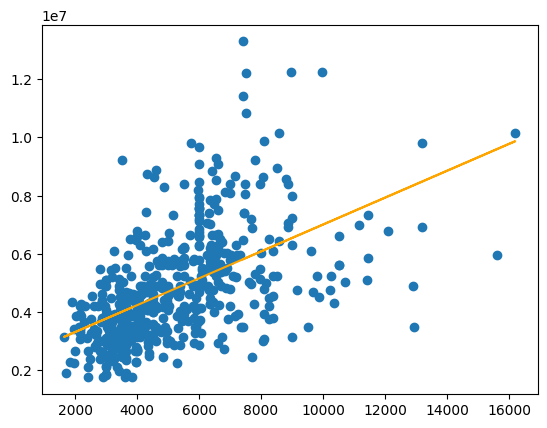

In [16]:
plt.plot(X.values, y_m, color = "orange")
plt.scatter(X,y)

In [17]:
model.coef_

array([461.97489427])

In [18]:
model.intercept_

2387308.48239643

In [19]:
mae_model = mean_absolute_error(y,y_m)

In [20]:
mae_model

1172305.5113148908

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [22]:
df.dropna(inplace=True)

In [23]:
data2 = df[["price","area","mainroad","basement","furnishingstatus"]]

In [24]:
X_train1 = data2.drop(columns = "price")
y_train1 = data2.price

In [25]:
model1 = make_pipeline(
    OneHotEncoder(),
    LinearRegression()
)


model1.fit(X_train1,y_train1)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['mainroad', 'basement',
                                     'furnishingstatus'])),
                ('linearregression', LinearRegression())])